# Adatok betöltése

**A betöltés előtt csv-ben elvégzett transzformációk:**
- 594 db megfigyelés egy oszloppal elcsúszott (pl. B oszlopban az A oszlopba szánt érték szerepelt ezekben a sorokban), ezeket még a csv-n belül korrigáltam
- Az egyes oszlopnevek tartalmaztak ékezetes betűket, ami az általam használt környezetben a csv betöltését megzavarja, ezért az ékezeteket levettem az oszlopnevekről
- A folytonos változók egy részénél '.' többinél pedig ',' jelezte a tizedesvesszőt, az egységes beolvasás érdekében az tizedesvesszőként használt '.'-ot ','-re cseréltem

In [1]:
import os
print(os.listdir("../input"))

['ecl-2022']


In [2]:
import pandas as pd
import numpy as np
Database = pd.read_csv("../input/ecl-2022/ECL_Input_data.csv", sep=';',decimal=',')
Database.head()

,ID,Ev,Ugyfel_ID,Stage,PD,LGD,EAD,Leiras,On balance,Off balance,CCF,Szegmens
0,3201965369938SF,2019,SM3CWZU,3,0.65360,NaN,99381778,FFCWZU,5.833710e+07,41044674.31,0.83280,SME
1,3201999035975MU,2019,SM3CNTJ,3,0.59903,0.80406,59755022,KHCNTJ,2.748731e+07,32267711.88,0.74672,SME
2,1201918566455EE,2019,SM1YCTQ,1,0.01856,0.36356,64554815,YCYCTQ,9.166784e+06,55388031.27,0.95843,SME
3,3201977348955ZW,2019,Ot3NBMK,3,0.57734,0.78118,89558202,QANBMK,5.677990e+07,32778301.93,0.75213,Other
4,3201992043240HU,2019,SM3ATRO,3,0.89204,0.85083,32409057,WLATRO,8.491173e+06,23917884.07,0.82754,SME


# Adatok elemzése és transzformálása:

### EAD Outlier kezelés:



In [3]:
Database.describe()

,Ev,Stage,PD,LGD,EAD,On balance,Off balance,CCF
count,60000.000000,60000.000000,60000.000000,48033.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000
mean,2020.000000,1.998900,0.332760,0.533321,5.046795e+07,2.531536e+07,2.515259e+07,0.849968
std,0.816503,0.815318,0.314223,0.188366,2.865041e+07,2.212784e+07,2.200042e+07,0.086860
min,2019.000000,1.000000,0.000010,0.300000,1.001059e+06,0.000000e+00,0.000000e+00,0.700000
25%,2019.000000,1.000000,0.075010,0.375070,2.552028e+07,7.066306e+06,6.992868e+06,0.774340
50%,2020.000000,2.000000,0.199770,0.499590,5.042909e+07,1.897708e+07,1.881632e+07,0.850075
75%,2021.000000,3.000000,0.624282,0.625660,7.533102e+07,3.857144e+07,3.840553e+07,0.925312
max,2021.000000,3.000000,0.999980,1.000000,9.999913e+07,9.971640e+07,9.934437e+07,1.000000


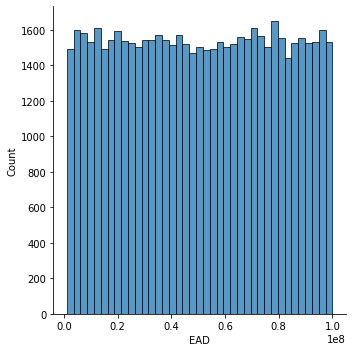

In [4]:
import seaborn as sns
sns.displot(Database, x="EAD")

Se a describe táblában látható percentilisek (maximális érték nem kifejezetten nagyobb mint a 75. percentilis), se az ábra alapján nem figyelhetőek meg outlier értékek EAD esetében. A feladat szövege/ügyfél kérése alapján elvégzem az outlier kezelést (habár jelezném, hogy ebben az esetben ez nem feltétlen indokolt adatok alapján), minden év felső 1 percentelisét, helyettesítem az adott év átlagával.

In [5]:
Data_2019=Database.loc[Database['Ev'] == 2019]
Data_2019.shape

(20000, 12)

In [6]:
Data_2020=Database.loc[Database['Ev'] == 2020]
Data_2020.shape

(20000, 12)

In [7]:
Data_2021=Database.loc[Database['Ev'] == 2021]
Data_2021.shape

(20000, 12)

In [8]:
Data_2019.EAD.quantile(0.99)

98978227.05

In [9]:
Data_2019.EAD.mean()

50505022.9161

In [10]:
Data_2019.loc[Data_2019['EAD'] > 98978227.05, 'EAD'] = 50505022.9161

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
Data_2019.EAD.mean() # alacsonyabb átlag

50015383.762461

In [12]:
Data_2019.EAD.quantile(0.99) # alacsonyabb már a 99. percentilis értéke

98038594.47999999

In [13]:
Data_2020.EAD.quantile(0.99)

98874041.09999996

In [14]:
Data_2020.EAD.mean()

50579132.1324

In [15]:
Data_2020.loc[Data_2020['EAD'] > 98874041.09999996, 'EAD'] = 50579132.1324

In [16]:
Data_2020.EAD.mean() #alacsonyabb átlag

50090671.59487401

In [17]:
Data_2020.EAD.quantile(0.99) #alacsonyabb már a 99. percentilis értéke

97994642.03

In [18]:
Data_2021.EAD.quantile(0.99)

98936115.28999999

In [19]:
Data_2021.EAD.mean()

50319686.62805

In [20]:
Data_2021.loc[Data_2021['EAD'] > 98936115.28999999, 'EAD'] = 50319686.62805

In [21]:
Data_2021.EAD.mean() #alacsonyabb átlag

49827898.49278049

In [22]:
Data_2021.EAD.quantile(0.99) #alacsonyabb már a 99. percentilis értéke

97904556.18999998

In [23]:
x=Data_2019.append(Data_2020)
Database_2=x.append(Data_2021)
Database_2.shape

(60000, 12)

In [24]:
Database_2.head()

,ID,Ev,Ugyfel_ID,Stage,PD,LGD,EAD,Leiras,On balance,Off balance,CCF,Szegmens
0,3201965369938SF,2019,SM3CWZU,3,0.65360,NaN,5.050502e+07,FFCWZU,5.833710e+07,41044674.31,0.83280,SME
1,3201999035975MU,2019,SM3CNTJ,3,0.59903,0.80406,5.975502e+07,KHCNTJ,2.748731e+07,32267711.88,0.74672,SME
2,1201918566455EE,2019,SM1YCTQ,1,0.01856,0.36356,6.455482e+07,YCYCTQ,9.166784e+06,55388031.27,0.95843,SME
3,3201977348955ZW,2019,Ot3NBMK,3,0.57734,0.78118,8.955820e+07,QANBMK,5.677990e+07,32778301.93,0.75213,Other
4,3201992043240HU,2019,SM3ATRO,3,0.89204,0.85083,3.240906e+07,WLATRO,8.491173e+06,23917884.07,0.82754,SME


### Hiányzó PD értékek helyettesítése

In [25]:
Database_2['PD'].isna().sum()

0

In [26]:
Database_2.PD.mean()

0.33276042766666664

<AxesSubplot:xlabel='PD', ylabel='Count'>

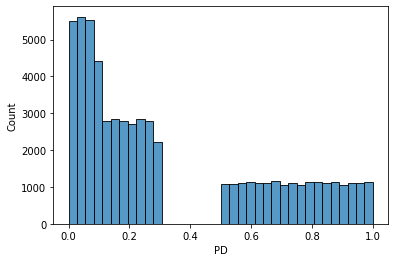

In [27]:
sns.histplot(data=Database_2, x="PD")

Nincs hiányzó PD érték, ezért nincs szükség helyettesítésre. A PD értékek relatív magasnak (33,3% az átlag), de a stage-ek átlaga is 2, ami alapján egy kifejezetten rossz minősígű portfoliót elemzünk. Habár furcsa, hogy 0,3 és 0,5 közé egy PD érték se esik, PD értékek esetében nem látok egyértelmő okot arra, hogy módosítani kellene a megadott adatokon.

### Hiányzó LGD értékek helyettesítése

In [28]:
Database_2['LGD'].isna().sum()

11967

Közel 20%-a hiányzik a megfigyeléseknek, ezért kulcsfontosságú a megfelelő helyettesítő módszertan megtalálása

**Jelen esetben használható statisztikai módszertanok:**
1. Egy mintára jellemző mutatószámmal (jellemzően átlag) helyettesítjük a hiányzó értékeket
2. Egy változós megoldás: Megkeressük azt a változót, ami legjobban magyarázza az LGD értékét (a meglévő 80% megfigyelés alapján) és annak segítségével adunk becslést a hiányzó LGD értékékre. Folytonos változó esetén egyváltozós regresszió segítségével határoznánk meg a helyettesítési értékeket, míg kategorikus változó esetén, az adott kategorikus változó értékkészlet elemekhez jelölünk ki helyettesítési értéket (jellemzően átlagot)
3. Több változós megoldás: Előfordulhat, hogy több változó is jól magyarázza a hiányzó LGD értékeket, ez esetben egy többváltozós regresszió segítségével határoznánk a helyettesítési értéket (kategorikus változókból előtte dummy változókat képeznénk).
4. Több változós megoldás 2: Több előreírt megírt algoritmus elérhető pythonban hiányzó adat pótlási célokra különböző könyvtárakkal, több releváns magyarázó változó esetében és magas elvárt pontosságnál érdemes lehet ilyenekkel is próbálkozni (MICE, Datawig)

**Megoldás menete**

- Megnézem, vannak-e olyan változók, amelyek jól magyarázzák az LGD értékét ábrák és különböző mutatószámok használatával
- Ezek alapján kiválasztom a megfelelő statisztikai módszertant a fent részletezett listából, törekedve arra, hogy minél egyszerűbb módszertant válasszak, de a helyettesítési érték meghatározása is kellően pontos legyen.
- Míg az első két módszertannál nem feltétlenül szükséges, de a 3. és 4.-nél a potenciális overfit elkerülése miatt érdemes train és teszt mintára bontani a meglévő LGD értékekkel rendelkező állományt. 30% teszt és 70% train mintabontást fogok használni. 


**Magyarázó változók keresése:**

Folytonos változóknál:
- Scatter Plot 
- Pearson korrelációs együttható

Kategorikus változóknál:
- Box plot
- Point Biserial Correlation

In [29]:
Database_3=Database_2.dropna(subset=['LGD'])

In [30]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(Database_3, test_size=0.3)

In [31]:
Database_3.shape

(48033, 12)

In [32]:
train.shape

(33623, 12)

<AxesSubplot:xlabel='Ev', ylabel='LGD'>

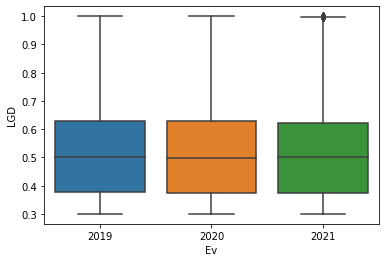

In [33]:
import seaborn as sns
sns.boxplot(x="Ev", y="LGD", data=train)

In [34]:
from scipy.stats import pointbiserialr
pointbiserialr(train['LGD'], train['Ev'])

PointbiserialrResult(correlation=-0.004640911430105675, pvalue=0.39479314436676133)

<AxesSubplot:xlabel='Stage', ylabel='LGD'>

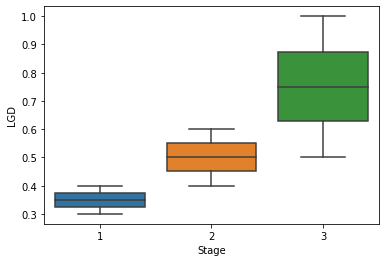

In [35]:
import seaborn as sns
sns.boxplot(x="Stage", y="LGD", data=train)

In [36]:
from scipy.stats import pointbiserialr
pointbiserialr(train['LGD'], train['Stage'])

PointbiserialrResult(correlation=0.8671934907029983, pvalue=0.0)

<AxesSubplot:xlabel='Szegmens', ylabel='LGD'>

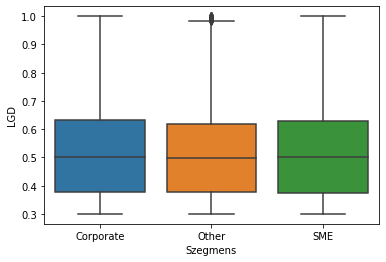

In [37]:
import seaborn as sns
sns.boxplot(x="Szegmens", y="LGD", data=train)

In [38]:
train['Szegmens_2'] = np.where(train['Szegmens']=='Corporate', 1,
              np.where(train['Szegmens']=='Other', 2,
              np.where(train['Szegmens']=='SME', 3, 'Error')))
train.head()

,ID,Ev,Ugyfel_ID,Stage,PD,LGD,EAD,Leiras,On balance,Off balance,CCF,Szegmens,Szegmens_2
39741,2202114218950TT,2021,Co2MNYQ,2,0.21421,0.49854,89503863.0,MJMNYQ,1.396260e+07,7.554126e+07,0.77382,Corporate,1
37124,1202011915223KQ,2020,Ot1RWKM,1,0.01191,0.34963,52234562.0,TKRWKM,1.953573e+07,3.269884e+07,0.85177,Other,2
46981,1202161359603NK,2021,Ot1GSKJ,1,0.06135,0.31872,96030202.0,VAGSKJ,6.376405e+07,3.226615e+07,0.90370,Other,2
57824,1202150379454DI,2021,SM1VCST,1,0.05037,0.34711,94540126.0,DKVCST,5.861488e+06,8.867864e+07,0.70765,SME,3
46844,3202158441479QA,2021,Ot3JVXT,3,0.65844,0.75103,14794529.0,WWJVXT,6.835072e+06,7.959457e+06,0.74475,Other,2


In [39]:
pointbiserialr(train['LGD'], train['Szegmens_2'].astype(np.int64))

PointbiserialrResult(correlation=-0.0015554749552129299, pvalue=0.7754829471012901)

<AxesSubplot:xlabel='LGD', ylabel='PD'>

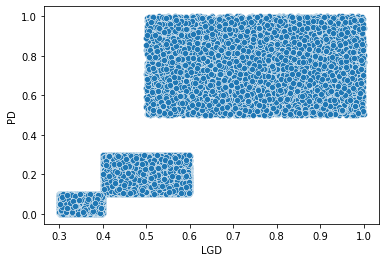

In [40]:
sns.scatterplot(data=train, x="LGD", y="PD")

In [41]:
train['LGD'].corr(train['PD'])

0.8253365799008394

<AxesSubplot:xlabel='LGD', ylabel='EAD'>

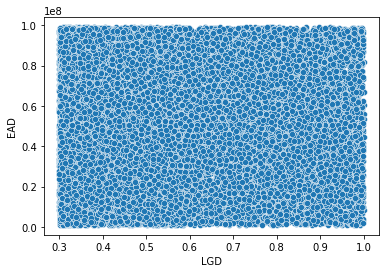

In [42]:
sns.scatterplot(data=train, x="LGD", y="EAD")

In [43]:
train['LGD'].corr(train['EAD'])

-0.00901219747967868

<AxesSubplot:xlabel='LGD', ylabel='CCF'>

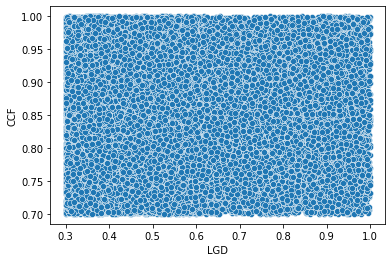

In [44]:
sns.scatterplot(data=train, x="LGD", y="CCF")

In [45]:
train['LGD'].corr(train['CCF'])

0.0037532568685888917

<AxesSubplot:xlabel='LGD', ylabel='On balance'>

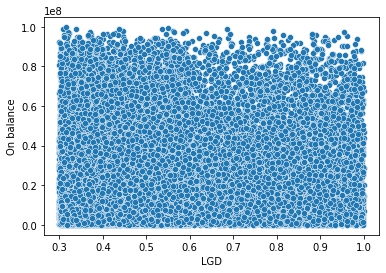

In [46]:
sns.scatterplot(data=train, x="LGD", y="On balance")

In [47]:
train['LGD'].corr(train['On balance'])

-8.931337846791787e-05

<AxesSubplot:xlabel='LGD', ylabel='Off balance'>

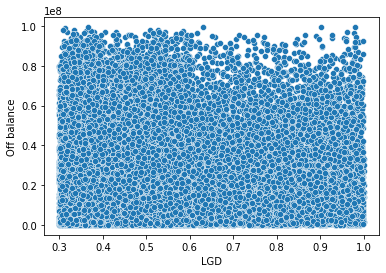

In [48]:
sns.scatterplot(data=train, x="LGD", y="Off balance")

In [49]:
train['LGD'].corr(train['Off balance'])

-0.010323713085737176

Az ábrák és a mutatószámok alapján egyértelműen elmondható, hogy az LGD értékével a PD és a Stage korrelál nagyon erősen, a többi változóval viszont szignifikánsan nem korrelál.

<AxesSubplot:xlabel='Stage', ylabel='PD'>

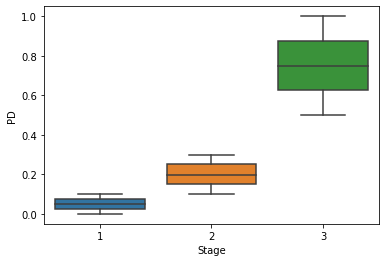

In [50]:
import seaborn as sns
sns.boxplot(x="Stage", y="PD", data=train)

In [51]:
pointbiserialr(train['PD'], train['Stage'])

PointbiserialrResult(correlation=0.9079170707504955, pvalue=0.0)

A stage és PD között is nagyon erős korreláció, ezért nem érdemes többváltozós helyettesítési módszertant keresni, mert egy modell alapú megoldásnál az erősen korreláló magyarázó változók csak problémát okoznának. Jelen esetben azt látjuk, hogy a stage értéke befolyásolja a PD és az LGD értékét, ez amit pénzügyi oldalról is vártunk volna.

In [52]:
Train_stage_1=train.loc[train['Stage'] == 1]
Train_stage_1.LGD.mean()

0.3500415877738707

In [53]:
Train_stage_2=train.loc[train['Stage'] == 2]
Train_stage_2.LGD.mean()

0.500706412085976

In [54]:
Train_stage_3=train.loc[train['Stage'] == 3]
Train_stage_3.LGD.mean()

0.7506732048300536

In [55]:
train['LGD_predicted'] = np.where(train['Stage']==1, 0.3500882054733055,
              np.where(train['Stage']==2, 0.5003910503205413,
              np.where(train['Stage']==3, 0.750840662699482, 'Error')))

In [56]:
train.head()

,ID,Ev,Ugyfel_ID,Stage,PD,LGD,EAD,Leiras,On balance,Off balance,CCF,Szegmens,Szegmens_2,LGD_predicted
39741,2202114218950TT,2021,Co2MNYQ,2,0.21421,0.49854,89503863.0,MJMNYQ,1.396260e+07,7.554126e+07,0.77382,Corporate,1,0.5003910503205413
37124,1202011915223KQ,2020,Ot1RWKM,1,0.01191,0.34963,52234562.0,TKRWKM,1.953573e+07,3.269884e+07,0.85177,Other,2,0.3500882054733055
46981,1202161359603NK,2021,Ot1GSKJ,1,0.06135,0.31872,96030202.0,VAGSKJ,6.376405e+07,3.226615e+07,0.90370,Other,2,0.3500882054733055
57824,1202150379454DI,2021,SM1VCST,1,0.05037,0.34711,94540126.0,DKVCST,5.861488e+06,8.867864e+07,0.70765,SME,3,0.3500882054733055
46844,3202158441479QA,2021,Ot3JVXT,3,0.65844,0.75103,14794529.0,WWJVXT,6.835072e+06,7.959457e+06,0.74475,Other,2,0.750840662699482


In [57]:
from sklearn.metrics import r2_score
y_true=np.asarray(train['LGD'])
y_pred=np.asarray(train['LGD_predicted'])
r2_score(y_true, y_pred)

0.7676118423736382

In [58]:
test['LGD_predicted'] = np.where(test['Stage']==1, 0.3500882054733055,
              np.where(test['Stage']==2, 0.5003910503205413,
              np.where(test['Stage']==3, 0.750840662699482, 'Error')))

In [59]:
test.head()

,ID,Ev,Ugyfel_ID,Stage,PD,LGD,EAD,Leiras,On balance,Off balance,CCF,Szegmens,LGD_predicted
38626,2202017263807MX,2020,Ot2RAOO,2,0.17260,0.45660,38074483.0,ZERAOO,2.752785e+07,1.054663e+07,0.91505,Other,0.5003910503205413
6183,1201967692393TK,2019,SM1LJTD,1,0.06769,0.30229,23933991.0,NGLJTD,6.629716e+06,1.730428e+07,0.89884,SME,0.3500882054733055
1355,1201901417156RV,2019,SM1NIZG,1,0.01410,0.30952,71569741.0,IBNIZG,1.059232e+07,6.097742e+07,0.95376,SME,0.3500882054733055
29352,1202036174343TY,2020,Co1SIPQ,1,0.03617,0.35617,43438018.0,BTSIPQ,3.570605e+07,7.731967e+06,0.98515,Corporate,0.3500882054733055
49615,1202102571635RY,2021,Ot1ATOZ,1,0.02570,0.32408,16352746.0,WEATOZ,1.427595e+07,2.076799e+06,0.77844,Other,0.3500882054733055


In [60]:
from sklearn.metrics import r2_score
y_true=np.asarray(test['LGD'])
y_pred=np.asarray(test['LGD_predicted'])
r2_score(y_true, y_pred)

0.7688620042160564

Train és teszt mintán is közel 77%-os R^2. Ez egy kifejezetten jó eredmény, a becslési pontatlanságok 77%-át sikerült megmagyarázni egy olyan modellhez képest, ami mindenhova az átlagot veszi (1-es módszertan). Bonyolultabb, többváltozós megoldásra nincs szükség, mert nincs más elérhető, modellezési szempontból hasznos változó, ezért ennél szignifikánsan jobb eredményt nem tudnánk elérni.

**Hiányzó LGD értékek helyettesítése**

A választott módszertan egyszerű és nem jár vele az overfit kockázata. Emiatt train teszt mintára sincsen feltétlenül szükség, sőt pontosabb becslést kapunk a hiányzó értékekre, ha az egyes átlagokat a teljes mintán számoljuk

In [61]:
Database_3_stage_1=Database_3.loc[Database_3['Stage'] == 1]
Database_3_stage_1.LGD.mean()

0.3500233310383676

In [62]:
Database_3_stage_2=Database_3.loc[Database_3['Stage'] == 2]
Database_3_stage_2.LGD.mean()

0.5001987129325822

In [63]:
Database_3_stage_3=Database_3.loc[Database_3['Stage'] == 3]
Database_3_stage_3.LGD.mean()

0.7511160648934164

In [64]:
Database_2['LGD_predicted'] = np.where(Database_2['Stage']==1, 0.3500233310383676,
              np.where(Database_2['Stage']==2, 0.5001987129325822,
              np.where(Database_2['Stage']==3, 0.7511160648934164, 'Error')))
Database_2.head()

,ID,Ev,Ugyfel_ID,Stage,PD,LGD,EAD,Leiras,On balance,Off balance,CCF,Szegmens,LGD_predicted
0,3201965369938SF,2019,SM3CWZU,3,0.65360,NaN,5.050502e+07,FFCWZU,5.833710e+07,41044674.31,0.83280,SME,0.7511160648934164
1,3201999035975MU,2019,SM3CNTJ,3,0.59903,0.80406,5.975502e+07,KHCNTJ,2.748731e+07,32267711.88,0.74672,SME,0.7511160648934164
2,1201918566455EE,2019,SM1YCTQ,1,0.01856,0.36356,6.455482e+07,YCYCTQ,9.166784e+06,55388031.27,0.95843,SME,0.3500233310383676
3,3201977348955ZW,2019,Ot3NBMK,3,0.57734,0.78118,8.955820e+07,QANBMK,5.677990e+07,32778301.93,0.75213,Other,0.7511160648934164
4,3201992043240HU,2019,SM3ATRO,3,0.89204,0.85083,3.240906e+07,WLATRO,8.491173e+06,23917884.07,0.82754,SME,0.7511160648934164


In [65]:
Database_2.shape

(60000, 13)

In [66]:
Database_2['LGD'] = Database_2['LGD'].fillna(Database_2['LGD_predicted'])

In [67]:
Database_2.head()

,ID,Ev,Ugyfel_ID,Stage,PD,LGD,EAD,Leiras,On balance,Off balance,CCF,Szegmens,LGD_predicted
0,3201965369938SF,2019,SM3CWZU,3,0.65360,0.7511160648934164,5.050502e+07,FFCWZU,5.833710e+07,41044674.31,0.83280,SME,0.7511160648934164
1,3201999035975MU,2019,SM3CNTJ,3,0.59903,0.80406,5.975502e+07,KHCNTJ,2.748731e+07,32267711.88,0.74672,SME,0.7511160648934164
2,1201918566455EE,2019,SM1YCTQ,1,0.01856,0.36356,6.455482e+07,YCYCTQ,9.166784e+06,55388031.27,0.95843,SME,0.3500233310383676
3,3201977348955ZW,2019,Ot3NBMK,3,0.57734,0.78118,8.955820e+07,QANBMK,5.677990e+07,32778301.93,0.75213,Other,0.7511160648934164
4,3201992043240HU,2019,SM3ATRO,3,0.89204,0.85083,3.240906e+07,WLATRO,8.491173e+06,23917884.07,0.82754,SME,0.7511160648934164


In [68]:
Database_2.dtypes

ID                object
Ev                 int64
Ugyfel_ID         object
Stage              int64
PD               float64
LGD               object
EAD              float64
Leiras            object
On balance       float64
Off balance      float64
CCF              float64
Szegmens          object
LGD_predicted     object
dtype: object

In [69]:
Database_2['LGD']=Database_2['LGD'].astype(str).astype(float)

> ### ECL és Coverage számolása

In [70]:
Database_2['ECL'] = Database_2['PD'] * Database_2['EAD'] * Database_2['LGD']

In [71]:
Database_2.head()

,ID,Ev,Ugyfel_ID,Stage,PD,LGD,EAD,Leiras,On balance,Off balance,CCF,Szegmens,LGD_predicted,ECL
0,3201965369938SF,2019,SM3CWZU,3,0.65360,0.751116,5.050502e+07,FFCWZU,5.833710e+07,41044674.31,0.83280,SME,0.7511160648934164,2.479440e+07
1,3201999035975MU,2019,SM3CNTJ,3,0.59903,0.804060,5.975502e+07,KHCNTJ,2.748731e+07,32267711.88,0.74672,SME,0.7511160648934164,2.878137e+07
2,1201918566455EE,2019,SM1YCTQ,1,0.01856,0.363560,6.455482e+07,YCYCTQ,9.166784e+06,55388031.27,0.95843,SME,0.3500233310383676,4.355948e+05
3,3201977348955ZW,2019,Ot3NBMK,3,0.57734,0.781180,8.955820e+07,QANBMK,5.677990e+07,32778301.93,0.75213,Other,0.7511160648934164,4.039133e+07
4,3201992043240HU,2019,SM3ATRO,3,0.89204,0.850830,3.240906e+07,WLATRO,8.491173e+06,23917884.07,0.82754,SME,0.7511160648934164,2.459764e+07


In [72]:
Database_2['Coverage']=Database_2['ECL']/Database_2['EAD']

In [73]:
Database_2.head()

,ID,Ev,Ugyfel_ID,Stage,PD,LGD,EAD,Leiras,On balance,Off balance,CCF,Szegmens,LGD_predicted,ECL,Coverage
0,3201965369938SF,2019,SM3CWZU,3,0.65360,0.751116,5.050502e+07,FFCWZU,5.833710e+07,41044674.31,0.83280,SME,0.7511160648934164,2.479440e+07,0.490929
1,3201999035975MU,2019,SM3CNTJ,3,0.59903,0.804060,5.975502e+07,KHCNTJ,2.748731e+07,32267711.88,0.74672,SME,0.7511160648934164,2.878137e+07,0.481656
2,1201918566455EE,2019,SM1YCTQ,1,0.01856,0.363560,6.455482e+07,YCYCTQ,9.166784e+06,55388031.27,0.95843,SME,0.3500233310383676,4.355948e+05,0.006748
3,3201977348955ZW,2019,Ot3NBMK,3,0.57734,0.781180,8.955820e+07,QANBMK,5.677990e+07,32778301.93,0.75213,Other,0.7511160648934164,4.039133e+07,0.451006
4,3201992043240HU,2019,SM3ATRO,3,0.89204,0.850830,3.240906e+07,WLATRO,8.491173e+06,23917884.07,0.82754,SME,0.7511160648934164,2.459764e+07,0.758974


In [74]:
Database_2.shape

(60000, 15)

#### A teljes ECL állomány:

In [75]:
Database_2.ECL.sum()

677151602429.6464

In [76]:
Database_2.EAD.sum()

2998679077002.31

In [77]:
Database_2.Coverage.mean()

0.22646059720074965

Közel 3000 milliárdnyi EAD-n 677 milliárd az ECL, valódi környezetben ez nagyon magas lenne, de ezeken az adatokon (átlag stage 2) reális.

#### Trendelemzéshez összegző táblák:

In [78]:
Database_2.groupby('Ev').sum()

,Stage,PD,LGD,EAD,On balance,Off balance,CCF,ECL,Coverage
Ev,,,,,,,,,
2019,40017,6684.99153,10669.650592,1.000308e+12,5.039176e+11,5.061829e+11,16993.74415,2.267381e+11,4549.209934
2020,39942,6635.09660,10680.713984,1.001813e+12,5.082152e+11,5.033675e+11,17003.40402,2.249549e+11,4530.603133
2021,39975,6645.53753,10657.318507,9.965580e+11,5.067886e+11,4.996051e+11,17000.91799,2.254586e+11,4507.822765


In [79]:
Database_2.groupby('Ev').mean()

,Stage,PD,LGD,EAD,On balance,Off balance,CCF,ECL,Coverage
Ev,,,,,,,,,
2019,2.00085,0.334250,0.533483,5.001538e+07,2.519588e+07,2.530914e+07,0.849687,1.133690e+07,0.227460
2020,1.99710,0.331755,0.534036,5.009067e+07,2.541076e+07,2.516837e+07,0.850170,1.124774e+07,0.226530
2021,1.99875,0.332277,0.532866,4.982790e+07,2.533943e+07,2.498026e+07,0.850046,1.127293e+07,0.225391


In [80]:
Database_2.groupby('Stage').sum()

,Ev,PD,LGD,EAD,On balance,Off balance,CCF,ECL,Coverage
Stage,,,,,,,,,
1,40349492,998.35441,6991.716037,1.003708e+12,5.117807e+11,5.012391e+11,16975.63811,1.758681e+10,349.425557
2,40634378,4023.83006,10061.997309,1.004119e+12,5.029981e+11,5.106778e+11,17092.87622,1.002946e+11,2012.851746
3,40216130,14943.44119,14953.969736,9.908520e+11,5.041426e+11,4.972386e+11,16929.55183,5.592702e+11,11225.358529


In [81]:
Database_2.groupby('Stage').mean()

,Ev,PD,LGD,EAD,On balance,Off balance,CCF,ECL,Coverage
Stage,,,,,,,,,
1,2019.999599,0.049980,0.350023,5.024821e+07,2.562106e+07,2.509332e+07,0.849844,8.804408e+05,0.017493
2,2020.002883,0.200031,0.500199,4.991644e+07,2.500488e+07,2.538665e+07,0.849715,4.985810e+06,0.100062
3,2019.997489,0.750587,0.751116,4.976905e+07,2.532235e+07,2.497557e+07,0.850347,2.809133e+07,0.563833
